In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import collections
import cv2
import seaborn as sns

In [2]:
import keras
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, MaxPool2D, AvgPool2D
from keras.models import Sequential
from keras.callbacks import LearningRateScheduler
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [3]:
import tensorflow

In [4]:
import collections

In [5]:
os.getcwd()

'C:\\Users\\jashj\\Desktop\\Kaggle\\German Traffic Sign Prediction'

In [6]:
data0=pd.read_pickle('data0.pickle')

# Reading the Data

In [7]:
data0.keys()

dict_keys(['x_test', 'y_validation', 'x_validation', 'labels', 'x_train', 'y_test', 'y_train'])

In [8]:
data0=pd.read_pickle('data0.pickle')
X_test=data0['x_test']
y_valid=data0['y_validation']
X_valid=data0['x_validation']
labels=data0['labels']
X_train=data0['x_train']
y_test=data0['y_test']
y_train=data0['y_train']

In [9]:
a=enumerate(labels)

In [10]:
for i in a:
    print(i)

(0, 'Speed limit (20km/h)')
(1, 'Speed limit (30km/h)')
(2, 'Speed limit (50km/h)')
(3, 'Speed limit (60km/h)')
(4, 'Speed limit (70km/h)')
(5, 'Speed limit (80km/h)')
(6, 'End of speed limit (80km/h)')
(7, 'Speed limit (100km/h)')
(8, 'Speed limit (120km/h)')
(9, 'No passing')
(10, 'No passing for vehicles over 3.5 metric tons')
(11, 'Right-of-way at the next intersection')
(12, 'Priority road')
(13, 'Yield')
(14, 'Stop')
(15, 'No vehicles')
(16, 'Vehicles over 3.5 metric tons prohibited')
(17, 'No entry')
(18, 'General caution')
(19, 'Dangerous curve to the left')
(20, 'Dangerous curve to the right')
(21, 'Double curve')
(22, 'Bumpy road')
(23, 'Slippery road')
(24, 'Road narrows on the right')
(25, 'Road work')
(26, 'Traffic signals')
(27, 'Pedestrians')
(28, 'Children crossing')
(29, 'Bicycles crossing')
(30, 'Beware of ice/snow')
(31, 'Wild animals crossing')
(32, 'End of all speed and passing limits')
(33, 'Turn right ahead')
(34, 'Turn left ahead')
(35, 'Ahead only')
(36, 'Go st

In [11]:
labels

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

# One Hot Encoding

In [12]:
y_train

array([37, 27, 38, ..., 11, 14, 30], dtype=int64)

In [13]:
y_valid

array([ 9, 37, 31, ...,  5, 18,  6], dtype=uint8)

In [14]:
y_test

array([25, 11, 38, ...,  8, 33, 10], dtype=uint8)

In [15]:
y_train = to_categorical(y_train, num_classes=43)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_valid = to_categorical(y_valid, num_classes=43)
y_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = to_categorical(y_test, num_classes=43)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Transposing the dataset to get the correct image arrays

In [18]:
X_train=np.transpose(X_train,axes=[0,2,3,1])

X_valid=np.transpose(X_valid,axes=[0,2,3,1])

X_test=np.transpose(X_test,axes=[0,2,3,1])

In [19]:
X_train=X_train/255

In [20]:
X_valid=X_valid/255
X_test=X_test/255

# Plotting images

In [21]:
X_train.shape

(86989, 32, 32, 3)

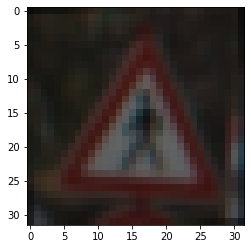

In [22]:
plt.imshow(X_train[1])

In [23]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
np.argmax(y_train[1])

27

In [25]:
labels[np.argmax(y_train[1])]

'Pedestrians'

In [26]:
counts=collections.Counter(data0['y_train'])

In [27]:
counts

Counter({37: 2023,
         27: 2023,
         38: 2023,
         28: 2023,
         42: 2023,
         4: 2023,
         7: 2023,
         29: 2023,
         17: 2023,
         23: 2023,
         33: 2023,
         39: 2023,
         41: 2023,
         14: 2023,
         18: 2023,
         35: 2023,
         6: 2023,
         5: 2023,
         31: 2023,
         26: 2023,
         34: 2023,
         12: 2023,
         13: 2023,
         24: 2023,
         8: 2023,
         0: 2023,
         20: 2023,
         2: 2023,
         1: 2023,
         40: 2023,
         3: 2023,
         25: 2023,
         11: 2023,
         9: 2023,
         21: 2023,
         22: 2023,
         36: 2023,
         15: 2023,
         30: 2023,
         16: 2023,
         10: 2023,
         19: 2023,
         32: 2023})

# Defining Model

In [28]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',input_shape=(32,32, 3)))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [29]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy', 'mse'])

In [34]:
history = model.fit(X_train, y_train,validation_data=(X_valid,y_valid),epochs=2,batch_size=64)

Train on 86989 samples, validate on 4410 samples
Epoch 1/2
86989/86989 [==============================] - 48s 548us/step - loss: 0.0073 - accuracy: 0.9981 - mse: 7.1968e-05 - val_loss: 0.1909 - val_accuracy: 0.9639 - val_mse: 0.0013
Epoch 2/2
86989/86989 [==============================] - 50s 576us/step - loss: 0.0030 - accuracy: 0.9995 - mse: 2.3776e-05 - val_loss: 0.1871 - val_accuracy: 0.9667 - val_mse: 0.0012


In [35]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test accuracy:', score)

Test accuracy: [0.2030125467932576, 0.9556611180305481, 0.0016279444098472595]
